# Rationale for using in situ data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy.stats import linregress
from sklearn.metrics import r2_score

In [2]:
# read in data 
pathData_train = 'data/training_extracted_features_and_labels.h5'
db_train = pd.read_hdf(pathData_train, 'df')

# Figure 2

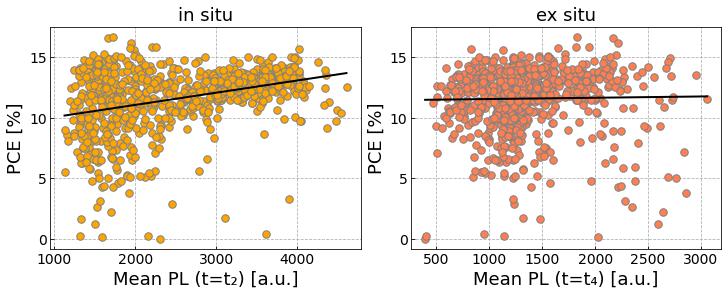

In [3]:
feature_list=["insitu_feature_1","exsitu_feature"]

scatterColors=["orange","coral"]
fontSizeSetLarge=18
fontSizeSetMedium=14
fig,ax = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)
for ix,feature in enumerate(feature_list):
    
    # create scatter plot    
    ax[ix].plot(db_train[feature],db_train["pce_mean"],".",color=scatterColors[ix], ms = 15, mec="gray")    
    
    # perform linear regression and draw fitted line
    slope, intercept, r_value, p_value, std_err = linregress(db_train[feature],db_train["pce_mean"])
    x=np.arange(min(db_train[feature]),max(db_train[feature]))
    y=slope*x+intercept
    ax[ix].plot(x,y,"k", linewidth=2)


ax[0].set_xlabel("Mean PL (t=t\u2082) [a.u.]",fontsize=fontSizeSetLarge)  
ax[0].set_ylabel("PCE [%]",fontsize=fontSizeSetLarge)    
ax[1].set_xlabel("Mean PL (t=t\u2084) [a.u.]",fontsize=fontSizeSetLarge)
ax[1].set_ylabel("PCE [%]",fontsize=fontSizeSetLarge) 
ax[0].set_title("in situ",fontsize=fontSizeSetLarge) 
ax[1].set_title("ex situ",fontsize=fontSizeSetLarge) 
ax[0].tick_params(axis='both', which='major',direction="in", labelsize=fontSizeSetMedium)
ax[1].tick_params(axis='both', which='major',direction="in", labelsize=fontSizeSetMedium)
ax[0].grid(which="both", linestyle='--')
ax[1].grid(which="both", linestyle='--')
plt.show()

# Table 1

In [4]:
label_list=["pce_mean","voc_mean","jsc_mean","ff_mean","meanThickness"]

for label in label_list:
    for feature in feature_list:
        print("correlation between: ", label,"&",feature)
        
        # compute Pearson correlation coefficient
        corrcoef=np.corrcoef(db_train[label], db_train[feature])[0,1]
        
        # get data           
        x=np.array(db_train[feature]).reshape(-1, 1)
        y=np.array(db_train[label]).reshape(-1, 1)
        
        # apply linear regression
        regr = linear_model.LinearRegression()  
        regr.fit(x,y)
        # get coefficient of determination r-squared
        r2=r2_score(y,regr.predict(x))                  

        print("corrcoef:",round(corrcoef,4),", r-squared:",round(r2,4))
    print("xx"*20)

correlation between:  pce_mean & insitu_feature_1
corrcoef: 0.3386 , r-squared: 0.1147
correlation between:  pce_mean & exsitu_feature
corrcoef: 0.0182 , r-squared: 0.0003
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
correlation between:  voc_mean & insitu_feature_1
corrcoef: 0.0496 , r-squared: 0.0025
correlation between:  voc_mean & exsitu_feature
corrcoef: 0.1249 , r-squared: 0.0156
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
correlation between:  jsc_mean & insitu_feature_1
corrcoef: 0.1707 , r-squared: 0.0291
correlation between:  jsc_mean & exsitu_feature
corrcoef: -0.0116 , r-squared: 0.0001
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
correlation between:  ff_mean & insitu_feature_1
corrcoef: 0.4225 , r-squared: 0.1785
correlation between:  ff_mean & exsitu_feature
corrcoef: -0.0313 , r-squared: 0.001
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
correlation between:  meanThickness & insitu_feature_1
corrcoef: -0.608 , r-squared: 0.3696
correlation between:  meanThickness & exsitu_feature
corr